In [13]:
import pandas as pd

dico = {
    'characters': pd.read_csv('csv/characters.csv'),
    'directors': pd.read_csv('csv/directors.csv'),
    'episodes': pd.read_csv('csv/episodes.csv'),
    'genres': pd.read_csv('csv/genres.csv'),
    'knownformovies': pd.read_csv('csv/knownformovies.csv'),
    'movies': pd.read_csv('csv/movies.csv'),
    'persons': pd.read_csv('csv/persons.csv'),
    'principals': pd.read_csv('csv/principals.csv'),
    'professions': pd.read_csv('csv/professions.csv'),
    'ratings': pd.read_csv('csv/ratings.csv'),
    'titles': pd.read_csv('csv/titles.csv'),
    'writers': pd.read_csv('csv/writers.csv')
}

for key, values in dico.items():
    print(f'\n\n{key} :\n')
    values.info()
    




characters :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405274 entries, 0 to 1405273
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   ('mid',)   1405274 non-null  object
 1   ('pid',)   1405274 non-null  object
 2   ('name',)  1405273 non-null  object
dtypes: object(3)
memory usage: 32.2+ MB


directors :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419861 entries, 0 to 419860
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   ('mid',)  419861 non-null  object
 1   ('pid',)  419861 non-null  object
dtypes: object(2)
memory usage: 6.4+ MB


episodes :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115576 entries, 0 to 115575
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ('mid',)            115576 non-null  object 
 1   ('parentMid',)      115576

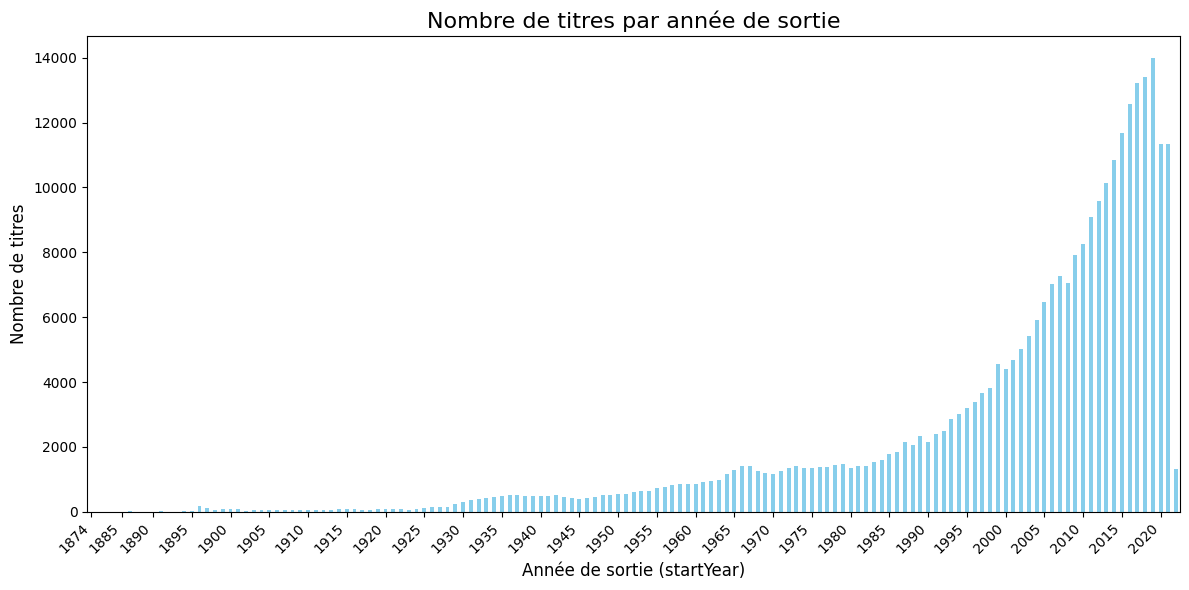

('genre',)
Drama        138499
Comedy       100811
Action        55128
Crime         46429
Adventure     42797
Animation     34917
Romance       32335
Mystery       25319
Thriller      22224
Family        20703
Name: count, dtype: int64


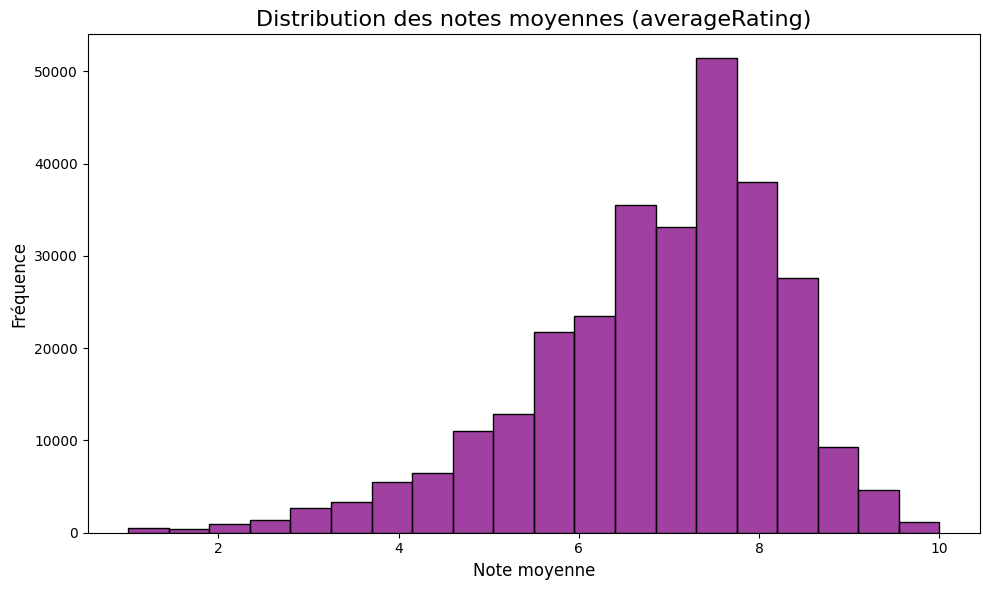

Le nombre moyen de 'principals' (acteurs, réalisateurs, etc.) par film est : 9.45


In [43]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# --- Tâche 1 : Distribution des films par année (Histogramme) ---
def plot_distribution_annee(titles_df):

    nb_par_annee = titles_df["('startYear',)"].value_counts().sort_index()
    
    plt.figure(figsize=(12, 6))
    nb_par_annee.plot(kind='bar', color='skyblue')
    
    tick_positions = nb_par_annee.index.tolist()
    
    annee_min = nb_par_annee.index.min()
    
    indices_a_afficher = [
        pos for i, pos in enumerate(tick_positions) 
        if pos % 5 == 0 or pos == annee_min # Affiche les années multiples de 5
    ]
    
    labels_a_afficher = [str(pos) for pos in indices_a_afficher]
    
    positions_des_barres = [nb_par_annee.index.get_loc(annee) for annee in indices_a_afficher]
    
    plt.xticks(
        ticks=positions_des_barres,
        labels=labels_a_afficher,
        rotation=45, 
        ha='right'
    )
    plt.title('Nombre de titres par année de sortie', fontsize=16)
    plt.xlabel('Année de sortie (startYear)', fontsize=12)
    plt.ylabel("Nombre de titres", fontsize=12)
    plt.tight_layout()
    plt.show()

# --- Tâche 2 : Top 10 des genres les plus fréquents ---
def plot_top_genres(genres):
    top_genres = genres["('genre',)"].value_counts().nlargest(10)
    print(top_genres)
    

# --- Tâche 3 : Distribution des notes (ratings) ---
def plot_ratings_distribution(ratings_df):
    plt.figure(figsize=(10, 6))
    sns.histplot(ratings_df["('averageRating',)"], bins=20, color='purple')
    plt.title('Distribution des notes moyennes (averageRating)', fontsize=16)
    plt.xlabel('Note moyenne', fontsize=12)
    plt.ylabel('Fréquence', fontsize=12)
    plt.tight_layout()
    plt.show()

# --- Tâche 4 : Nombre moyen d’acteurs par film ---
def calculate_avg_principals(principals_df):
    """Calcule le nombre moyen de 'principals' par film."""
    # Compter le nombre unique de personnes ('pid') par titre ('mid')
    principals_per_movie = principals_df.groupby("('mid',)")["('pid',)"].nunique()

    # Calculer la moyenne
    avg_principals = principals_per_movie.mean()

    print(f"Le nombre moyen de 'principals' (acteurs, réalisateurs, etc.) par film est : {avg_principals:.2f}")


# --- Exécution de toutes les analyses ---
plot_distribution_annee(dico['movies'])
plot_top_genres(dico['genres'])
plot_ratings_distribution(dico['ratings'])
calculate_avg_principals(dico['principals'])

In [53]:

# Liste de tous les identifiants de titres valides (Clé Primaire)
valid_mids = set(movies["('mid',)"])

# Dictionnaire pour stocker les résultats d'orphelinat
orphan_results = {}


for key, value in dico.items():
    try:
        current_mids = set(value["('mid',)"])
        
        orphan_mids = current_mids - valid_mids
        
        orphan_results[key] = len(orphan_mids)
        
        print(f"Table '{key}' :")
        print(f"   Nombre d'orphelins trouvés : {len(orphan_mids)}")
    except:
        pass

Table 'characters' :
   Nombre d'orphelins trouvés : 0
Table 'directors' :
   Nombre d'orphelins trouvés : 0
Table 'episodes' :
   Nombre d'orphelins trouvés : 0
Table 'genres' :
   Nombre d'orphelins trouvés : 0
Table 'knownformovies' :
   Nombre d'orphelins trouvés : 0
Table 'movies' :
   Nombre d'orphelins trouvés : 0
Table 'principals' :
   Nombre d'orphelins trouvés : 0
Table 'ratings' :
   Nombre d'orphelins trouvés : 0
Table 'titles' :
   Nombre d'orphelins trouvés : 0
Table 'writers' :
   Nombre d'orphelins trouvés : 0
